In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#import warnings
import warnings
warnings.filterwarnings('ignore')

#***Load Dataset:-***

In [62]:
df=pd.read_csv('/content/bnpl_dataset.csv')

In [63]:
df.head()

,Transaction_ID,Customer_Age,Gender,Annual_Income,Credit_Score,Purchase_Category,BNPL_Provider,Purchase_Amount,Repayment_Status
0,6cbfd4e5-8e91-4a7b-8a14-e3dfa86a3359,56,Male,32293,353,Beauty,Sezzle,249,Defaulted
1,863e8aa6-847e-4ae0-b96b-65241f3450a2,46,Male,72774,354,Groceries,Affirm,188,Paid On Time
2,a24efee2-16f2-42dc-a0e7-6df4960df0b8,32,Male,82207,630,Travel,Sezzle,1610,Paid On Time
3,bbad847a-a92f-4766-ba3f-98b9b199b4cf,60,Male,92498,470,Fashion,Sezzle,120,Paid On Time
4,3f1b1928-09ca-4d06-8ec3-4efd3468d0ec,25,Male,32060,502,Travel,Klarna,1849,Paid On Time


In [64]:
df.shape

(50000, 9)

#***EDA(Explotary Data Analysis):-***

In [65]:
#Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Transaction_ID     50000 non-null  object
 1   Customer_Age       50000 non-null  int64 
 2   Gender             50000 non-null  object
 3   Annual_Income      50000 non-null  int64 
 4   Credit_Score       50000 non-null  int64 
 5   Purchase_Category  50000 non-null  object
 6   BNPL_Provider      50000 non-null  object
 7   Purchase_Amount    50000 non-null  int64 
 8   Repayment_Status   50000 non-null  object
dtypes: int64(4), object(5)
memory usage: 3.4+ MB


In [66]:
#check the null values
df.isnull().sum()

,0
Transaction_ID,0
Customer_Age,0
Gender,0
Annual_Income,0
Credit_Score,0
Purchase_Category,0
BNPL_Provider,0
Purchase_Amount,0
Repayment_Status,0


In [67]:
#check the duplicated column
df.duplicated().sum()

np.int64(0)

In [68]:
#drop the column that unnecessary for model
df.drop("Transaction_ID", axis=1, inplace=True)

In [69]:
df.describe()

,Customer_Age,Annual_Income,Credit_Score,Purchase_Amount
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,40.979240,69980.860200,573.569300,563.221980
std,13.528733,28923.444012,158.853766,706.078491
min,18.000000,20000.000000,300.000000,20.000000
25%,29.000000,44915.500000,435.000000,124.000000
50%,41.000000,70071.500000,572.000000,229.000000
75%,53.000000,95262.250000,711.000000,785.000000
max,64.000000,119998.000000,849.000000,2999.000000


In [70]:
#Numerical column list:-
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols

Index(['Customer_Age', 'Annual_Income', 'Credit_Score', 'Purchase_Amount'], dtype='object')

In [71]:
#check the categorical column create group of categorical column
categorical_cols = df.select_dtypes(include=["object"]).columns
categorical_cols


Index(['Gender', 'Purchase_Category', 'BNPL_Provider', 'Repayment_Status'], dtype='object')

#***Bar Chart for All Categorical Columns:-***

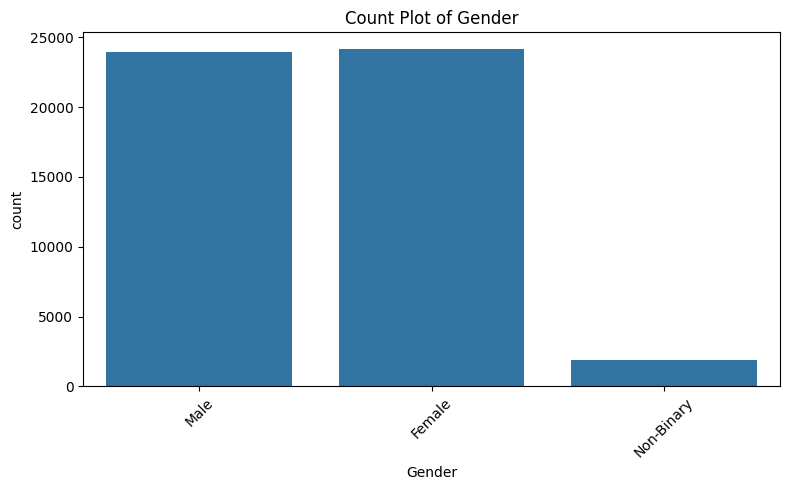

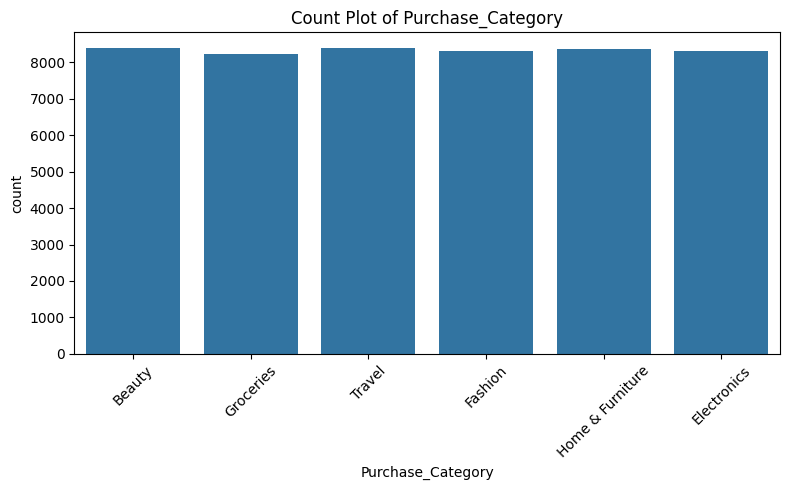

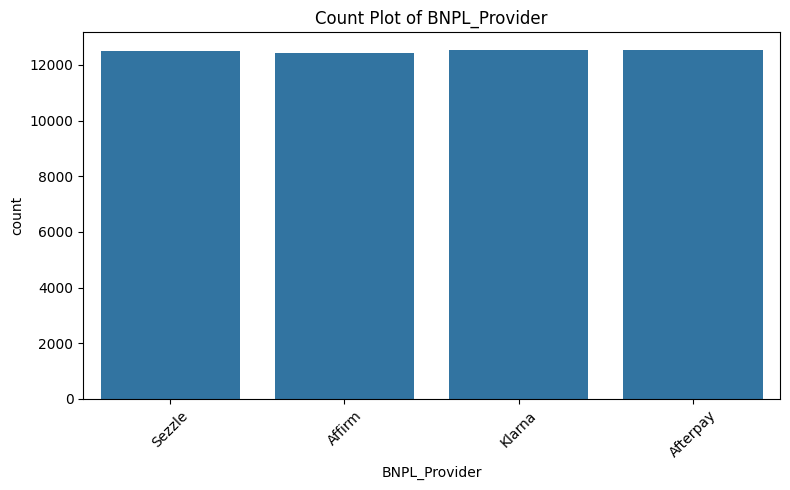

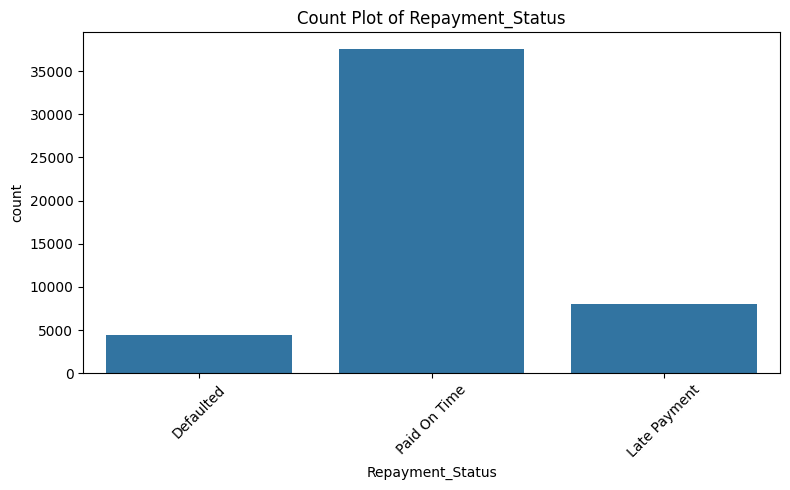

In [72]:
#Bar Chart for All Categorical Columns
for col in categorical_cols:
    plt.figure(figsize=(8,5))
    sns.countplot(x=df[col])
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


#***Distribution for Numerical Columns:-***

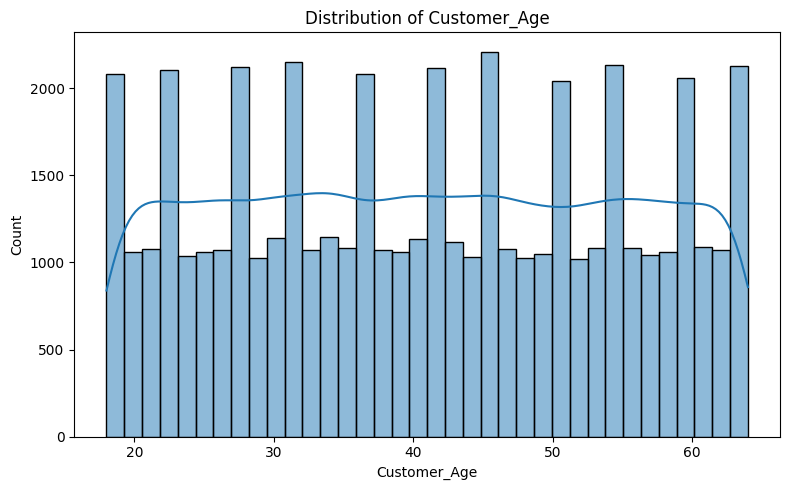

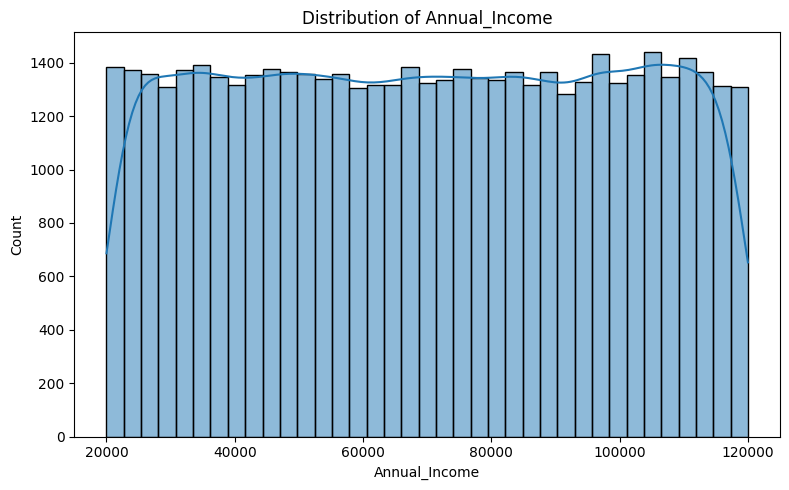

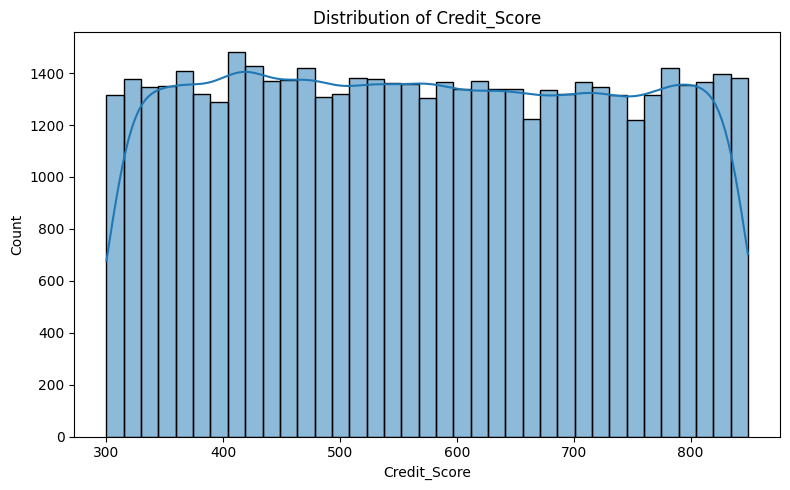

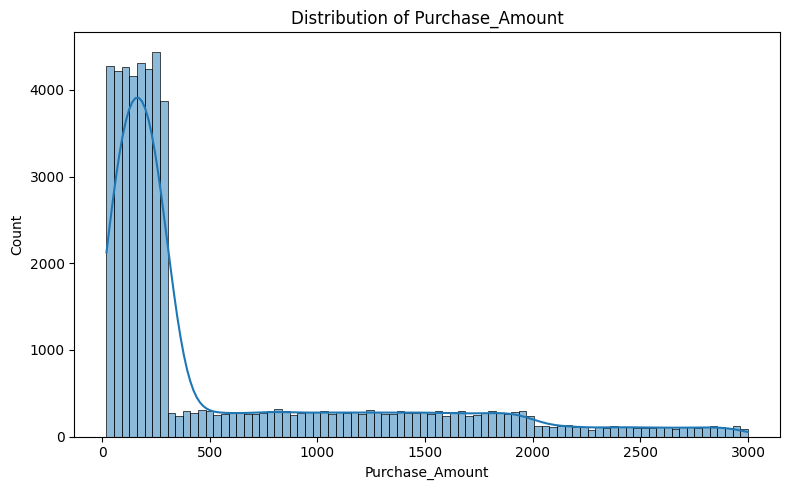

In [73]:
#Distribution for Numerical Columns
for col in numerical_cols:
    plt.figure(figsize=(8,5))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()


#***Boxplot for Outlier Detection:-***

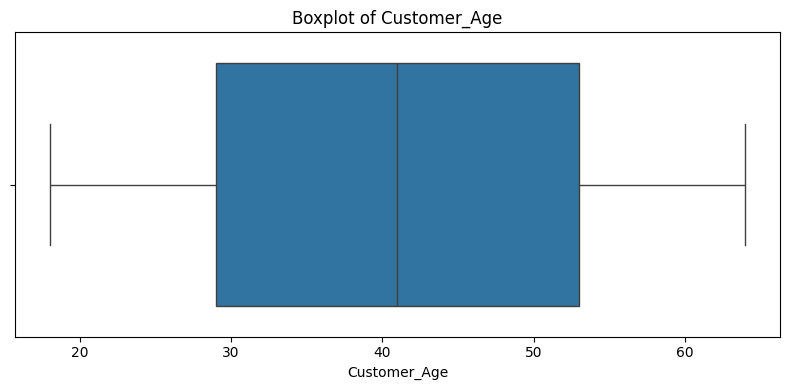

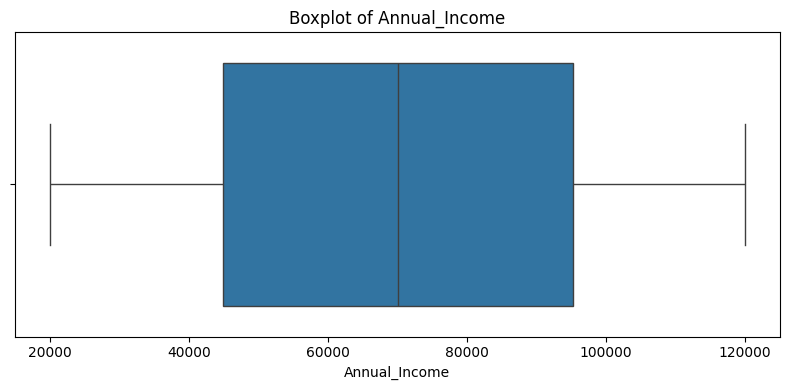

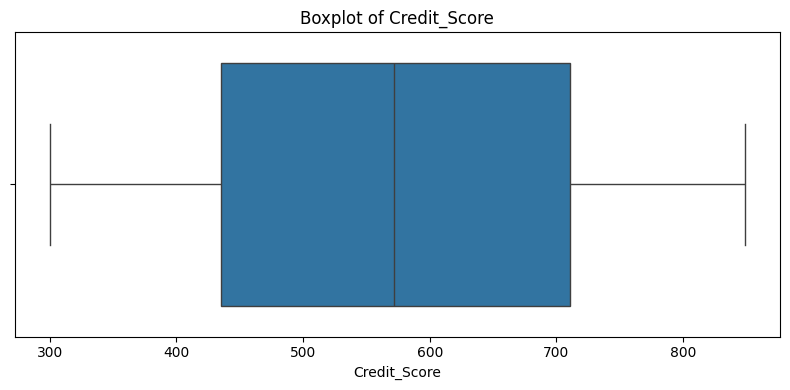

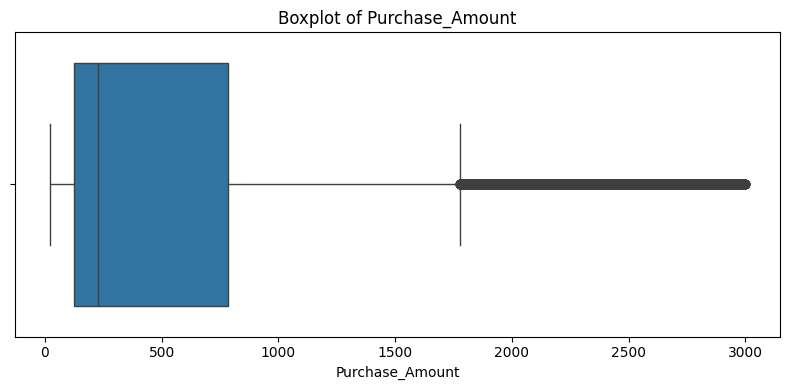

In [74]:
#Boxplot for Outlier Detection
for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()


#***Convert Categorical Column To Numerical Column:-***

In [75]:
#check the unique feature in every column
for col in categorical_cols:
    print(col, df[col].unique())

Gender ['Male' 'Female' 'Non-Binary']
Purchase_Category ['Beauty' 'Groceries' 'Travel' 'Fashion' 'Home & Furniture' 'Electronics']
BNPL_Provider ['Sezzle' 'Affirm' 'Klarna' 'Afterpay']
Repayment_Status ['Defaulted' 'Paid On Time' 'Late Payment']


In [76]:
df['Repayment_Status'].unique()

array(['Defaulted', 'Paid On Time', 'Late Payment'], dtype=object)

In [77]:
#Apply the the encoding on the dataset all categorical column also save as model
import joblib

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le   # save encoder for that column

# Save all encoders
joblib.dump(label_encoders, "label_encoders.pkl")

['label_encoders.pkl']

In [78]:
df['Repayment_Status'].unique()

array([0, 2, 1])

Here target column values are numerical transferred:-
defaulted=0,
paid on time=2,
pay later=1

#***Correlation of Features:-***

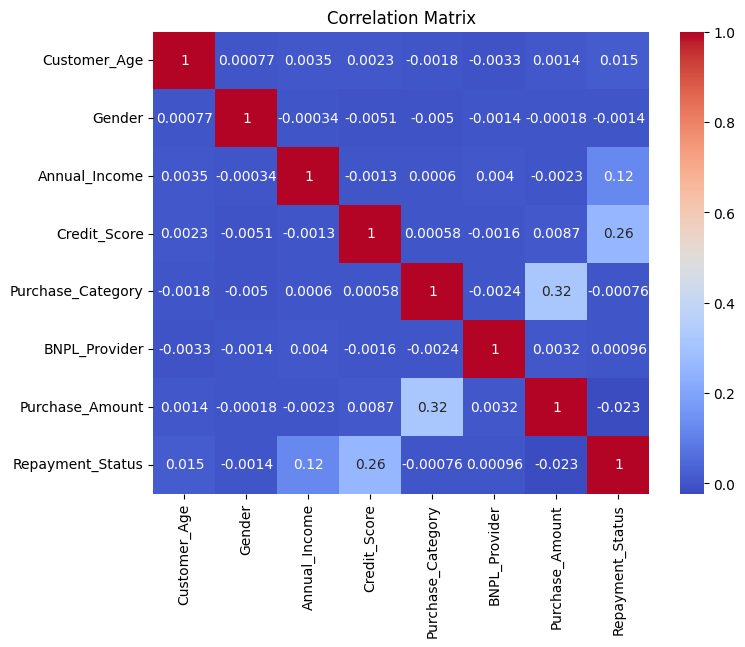

In [79]:
#correlation of features
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


#***Spliting the Dataset in to Train and Test:-***

In [80]:
#spliting the dataset
X=df.drop('Repayment_Status', axis=1)
y=df['Repayment_Status']

In [81]:
#spliting the dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
#Check the shape of X_train,X_test,y_train,y_test
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (40000, 7)
X_test shape: (10000, 7)
y_train shape: (40000,)
y_test shape: (10000,)


#***Check target column imbalance:-***

In [83]:
#value count
print(y_train.value_counts())

Repayment_Status
2    30107
1     6365
0     3528
Name: count, dtype: int64


That means:-

Class 2 ≈ 75%,

Class 1 ≈ 16%,

Class 0 ≈ 9%,

This is heavily imbalanced multi-class classification.

#***Model Building:***-

In [84]:
#model building using the 3 iteam in target column best moddel for
model = RandomForestClassifier(
    class_weight='balanced',
    random_state=42
)

model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [85]:
#predict the y_pred
y_pred = model.predict(X_test)

In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.30      0.06      0.10       851
           1       0.32      0.05      0.09      1644
           2       0.77      0.98      0.86      7505

    accuracy                           0.75     10000
   macro avg       0.46      0.36      0.35     10000
weighted avg       0.65      0.75      0.67     10000



#***Use SMOTE to improve the model accuracy:-***

In [87]:
#use smote
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

model1 = RandomForestClassifier(random_state=42)
model1.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [88]:
#predict the y_pred_resampled
y_pred_resampled = model1.predict(X_test)

In [89]:
#check the accuracy of model after using SMOTE
print(classification_report(y_test, y_pred_resampled))

              precision    recall  f1-score   support

           0       0.17      0.30      0.22       851
           1       0.22      0.25      0.23      1644
           2       0.81      0.72      0.76      7505

    accuracy                           0.61     10000
   macro avg       0.40      0.42      0.41     10000
weighted avg       0.66      0.61      0.63     10000



Accuracy are dropped but still i can see the improved the other two class accoracy about detecting Defaulted / Late Payment → MUCH better
Your class 0 recall jumped:

0.06 ➜ 0.30

#***Save the Model:-***
save the model as per requirement

In [90]:
#Save the model
import joblib
joblib.dump(model, 'model.pkl')

['model.pkl']